# Optional Lab: Linear Regression using Scikit-Learn

There is an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms that you will work with in this course.



## Goals
In this lab you will:
- Utilize  scikit-learn to implement linear regression using Gradient Descent

## Tools
You will utilize functions from scikit-learn as well as matplotlib and NumPy. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

### Load the data set

In [5]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

### Scale/normalize the training data

In [6]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
'''
scaler.fit_transform(X_train) first calculates the mean and standard deviation for each feature in X_train.
Then, it scales X_train by subtracting the mean and dividing by the standard deviation, resulting in the normalized data stored in X_norm.
'''
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}") # gives the peak-to-peak range of each feature in X_train.
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}") #gives the peak-to-peak range of each feature in the normalized data, X_norm.

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


The method `fit_transform(X_train)` is part of the `StandardScaler` class in the `scikit-learn` library. Here's a breakdown of what it does:

### `fit_transform(X_train)` Explanation:

1. **`fit`**:
   - The `fit` method is used to compute the statistics (mean and standard deviation) required for scaling the data. When you call `fit(X_train)`, it calculates:
     - The mean (`mu`) of each feature (column) in the input data (`X_train`).
     - The standard deviation (`sigma`) of each feature in the input data.
   - These computed statistics are stored in the scaler object.

2. **`transform`**:
   - The `transform` method applies the scaling transformation to the data. It uses the statistics (mean and standard deviation) that were computed during the `fit` step to standardize the input data. Specifically, for each feature in `X_train`, the transformation is:
   
   $$
   X_{\text{norm}} = \frac{X - \mu}{\sigma}
   $$

   Where:
   - \( X \) is the original feature value.
   - \( \mu \) is the mean of the feature (calculated during `fit`).
   - \( \sigma \) is the standard deviation of the feature (calculated during `fit`).

   This process scales each feature to have a mean of 0 and a standard deviation of 1, making the features comparable in terms of scale.

### Combining `fit` and `transform`:
- The `fit_transform(X_train)` method combines both `fit` and `transform` into a single step. It first computes the statistics (mean and standard deviation) and then applies the transformation to `X_train`, returning the normalized version of the data.


### Create and fit the regression model

In [7]:
sgdr = SGDRegressor(max_iter=1000) #This initializes an instance of SGDRegressor, which stands for Stochastic Gradient Descent Regressor from Scikit-learn. The max_iter=1000 argument specifies the maximum number of passes (iterations) over the training data. This controls how long the model will train.
#The model will run for up to 1000 iterations. If the cost function stops improving (by tol=1e-3), training stops early.
#The default value of tol (tolerance) in SGDRegressor is 1e-3 (0.001).
'''
1) SGDRegressor (Stochastic Gradient Descent Regressor): The SGDRegressor in Scikit-learn is a linear regression model that is trained using Stochastic Gradient Descent (SGD). This method is useful for large datasets and online learning, where training data might not fit into memory all at once.
2) SGD is an optimization algorithm used to minimize the cost function by updating model parameters iteratively. Unlike Batch Gradient Descent, which updates parameters after processing the entire dataset, SGD updates the parameters after each training example, making it computationally efficient for large datasets.
3)When to Use SGDRegressor?
    When dataset is too large to fit into memory.
    When you need real-time learning (online learning).
    When training a simple linear model with many samples.
4) Conclusion:
    SGDRegressor is a linear model trained using Stochastic Gradient Descent.
    It updates weights after each sample, making it efficient for large datasets.
    Feature scaling is important for stable training.
    It is suitable for online learning but requires careful tuning of hyperparameters.
'''
sgdr.fit(X_norm, y_train) #This trains the SGDRegressor model on the normalized training features (X_norm) and target values (y_train).
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 125, number of weight updates: 12376.0


# **Batch Gradient Descent vs. Stochastic Gradient Descent (SGD)**

In **Batch Gradient Descent**, weights are updated **once per epoch** (An epoch refers to one complete pass through the entire training dataset during model training.), whereas in **Stochastic Gradient Descent (SGD)**, weights are updated **after each training sample**.

## **How `t_` and `n_iter_` Compare in Batch Gradient Descent?**

- In **Batch Gradient Descent**, the total number of weight updates **equals** the number of epochs because weights are updated **once per epoch**:

  $$
  t_ = n_{\text{iter}}
  $$

- In **SGD**, weights are updated **after each sample**, so:

  $$
  t_ = n_{\text{samples}} \times n_{\text{iter}}
  $$

## **Comparison Table**

| Type of Gradient Descent  | Weight Updates Per Epoch | Relationship Between `t_` and `n_iter_` |
|---------------------------|-------------------------|------------------------------------------|
| **Batch Gradient Descent** | **1 (per epoch)**       | $t_ = n_{\text{iter}}$                  |
| **Stochastic Gradient Descent (SGD)** | **1 per sample** | $t_ = n_{\text{samples}} \times n_{\text{iter}}$ |
| **Mini-Batch Gradient Descent** | **1 per mini-batch** | $t_ = \frac{n_{\text{samples}}}{\text{batch size}} \times n_{\text{iter}}$ |

## **Example Scenario**
- **Dataset:** 1,000 training samples  
- **Batch Size:**  
  - **Batch GD:** 1,000 (all samples in one batch)  
  - **SGD:** 1 (each sample is its own batch)  
  - **Mini-Batch GD:** 100 (10 mini-batches per epoch)  
- **Epochs (`n_iter_`):** 10  

| Method  | Weight Updates Per Epoch | Total Updates (`t_`) |
|---------|-------------------------|----------------------|
| **Batch GD**  | 1 | 10 |
| **SGD**       | 1,000 | 10,000 |
| **Mini-Batch GD (batch size = 100)** | 10 | 100 |

## **Key Takeaways**
- **Batch Gradient Descent:** $t_ = n_{\text{iter}}$
- **SGD:** t_ grows with dataset size.
- **Mini-Batch GD:** Falls between the two.


### View parameters
Note, the parameters are associated with the *normalized* input data. The fit parameters are very close to those found in the previous lab with this data.

In [12]:
b_norm = sgdr.intercept_ #sgdr.intercept_: This stores the bias term (or intercept), denoted as 𝑏 in a linear regression model.In scikit-learn, it is stored as a NumPy array, so b_norm is an array with one element.
w_norm = sgdr.coef_ #sgdr.coef_: This stores the weight coefficients (denoted as 𝑤 in the model. It is an array where each element corresponds to a feature in the dataset.

print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")
'''
 Why Do These Values Differ?
Different Optimization Algorithms:
The previous lab might have used batch gradient descent, whereas SGDRegressor uses stochastic gradient descent, which updates weights after each sample and can lead to slightly different results.
Learning Rate and Convergence Differences:
SGD introduces randomness and may not settle exactly at the same optimal point as batch gradient descent.
'''

model parameters:                   w: [110.17 -21.07 -32.45 -38.06], b:[363.16]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


'\n Why Do These Values Differ?\nDifferent Optimization Algorithms:\nThe previous lab might have used batch gradient descent, whereas SGDRegressor uses stochastic gradient descent, which updates weights after each sample and can lead to slightly different results.\nLearning Rate and Convergence Differences:\nSGD introduces randomness and may not settle exactly at the same optimal point as batch gradient descent.\n'

### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [13]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Prediction on training set:\n{y_pred_sgd[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.13 485.97 389.63 492.13]
Prediction on training set:
[295.13 485.97 389.63 492.13]
Target values 
[300.  509.8 394.  540. ]


### Plot Results
Let's plot the predictions versus the target values.

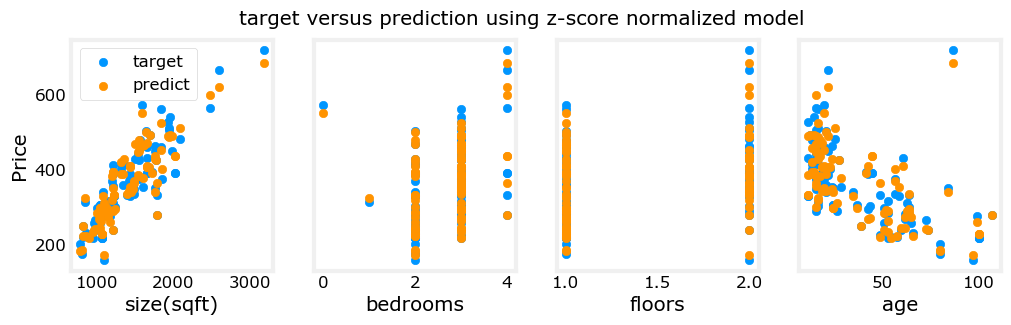

In [10]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

## Congratulations!
In this lab you:
- utilized an open-source machine learning toolkit, scikit-learn
- implemented linear regression using gradient descent and feature normalization from that toolkit